# Before Convolutional Neural Network
---

## Real Game : CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### 데이터를 불러옵시다.

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 4867
다음 그림은 Truck 입니다.


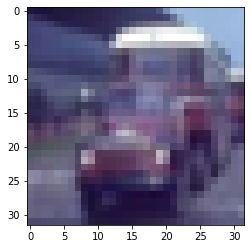

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [6]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


### 코드를 완성해주세요!

해야 할 일

1. 전처리
    * x, y에 대하여 모두! 단, x에 대하여 reshape를 의도한 것은 아닙니다!

2. 모델링
    * 이미지 데이터를 펼쳐주는 레이어를 사용하세요.
    * 히든 레이어 4개 사용, 각 노드는 512, 512, 256, 128
    * 이 문제는 회귀? 분류?

3. 학습
    * epochs=50, validation_split=0.2, early stopping
    * epoch별 accuracy, loss가 보고 싶다면 history라는 변수에 담아내자!

In [7]:
#############
# Your Code # Scaling : min-max
#############
max_n, min_n = train_x.max(), train_x.min()
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)
train_x.max(), train_x.min()

(1.0, 0.0)

In [8]:
#############
# Your Code # One-Hot Encoding
#############
from tensorflow.keras.utils import to_categorical
class_n = len(np.unique(train_y))

In [9]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [10]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 10))

In [11]:
#############
# Your Code # Sequential API
#############

#1. 세션 클리어
keras.backend.clear_session()

#2. 모델 선언
model = keras.models.Sequential()

#3. 모델 조립
model.add(keras.layers.Input(shape = (32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = "swish"))
model.add(keras.layers.Dense(512, activation = "swish"))
model.add(keras.layers.Dense(256, activation = "swish"))
model.add(keras.layers.Dense(128, activation = "swish"))
model.add(keras.layers.Dense(10, activation = "softmax"))

#4. 컴파일
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")

#5. 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
Non-

In [12]:
#############
# Your Code # Early Stopping
#############
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "val_loss",
                   min_delta = 0,
                   patience = 4,
                   restore_best_weights = True)

In [13]:
history = model.fit(train_x, train_y, epochs = 10000, verbose = 1,
                    callbacks = [es], validation_split = 0.2)

Epoch 1/10000
1250/1250 [==============================] - 12s 5ms/step - loss: 1.8516 - accuracy: 0.3231 - val_loss: 1.7542 - val_accuracy: 0.3675
Epoch 2/10000
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6794 - accuracy: 0.3925 - val_loss: 1.6264 - val_accuracy: 0.4213
Epoch 3/10000
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5850 - accuracy: 0.4299 - val_loss: 1.5736 - val_accuracy: 0.4416
Epoch 4/10000
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5313 - accuracy: 0.4481 - val_loss: 1.5721 - val_accuracy: 0.4378
Epoch 5/10000
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4802 - accuracy: 0.4673 - val_loss: 1.5440 - val_accuracy: 0.4482
Epoch 6/10000
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4380 - accuracy: 0.4829 - val_loss: 1.4956 - val_accuracy: 0.4642
Epoch 7/10000
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3944 - accuracy: 0.4976 - val_loss: 



---



In [15]:
performance_test = model.evaluate(test_x, test_y)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 1.4529 - accuracy: 0.4894
Test Loss : 1.452927,  Test Accuracy : 48.940%


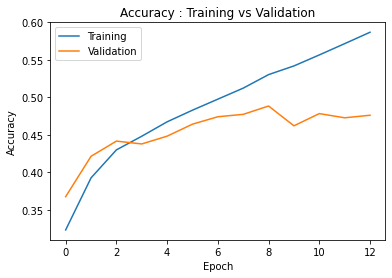

In [16]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

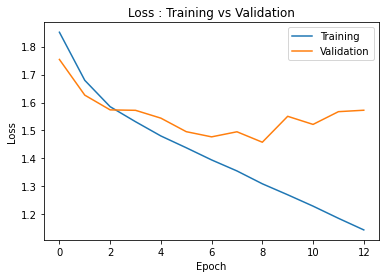

In [17]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [18]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 55.78%
테스트 정확도 : 48.94%


id = 9806
다음 그림은 Ship 입니다.
모델의 예측 : Ship
모델의 카테고리별 확률 : 
{'Airplane': 18.0, 'Automobile': 0.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 77.0, 'Truck': 0.0}
정답입니다


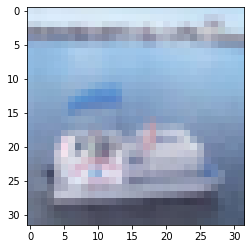

In [24]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()